# Predicting Heart Disease Using Machine Learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition:

In a statement:
> Given clinical parameters about a patient, can we predict wether or not they have heart disease?

## 2. Data
The original data came from cleveland database from UCI ML repository https://archive.ics.uci.edu/dataset/45/heart+disease


there is lso a version of it available on kaggle https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland

## 3. Evaluation

> if we can reach 95% accuracy at predicting wether or not a patient has herat disease during the proof of concept, we will pursue the project.

## 4. Features

this is where you get different information about each of the features in your data.

**Create data dictionary**

* Age: Patients Age in years (Numeric)
* Sex: Gender (Male : 1; Female : 0) (Nominal)
* cp: Type of chest pain experienced by patient. This term categorized into 4 category. (0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal))
* trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
* chol: Serum cholesterol in mg/dl (Numeric)
* fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
* restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
* thalach: Maximum heart rate achieved (Numeric)
* exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
* oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
* slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
* ca: The number of major vessels (0–3)(nominal)
* thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
* target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

## 5. Modelling 

## Preparing the tools
We are going to use pandas, numpy and Matplotlib for data analysis and manipulation

In [1]:
# Import all the tools we need

 # Regualr EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease (1).csv")
df.shape

(303, 14)

# Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find more about the data, and become a subject matter expert on the dataset you are working with.

1. What question(s) are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it
4. Where are the outliers and why should we care about them
5. How can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

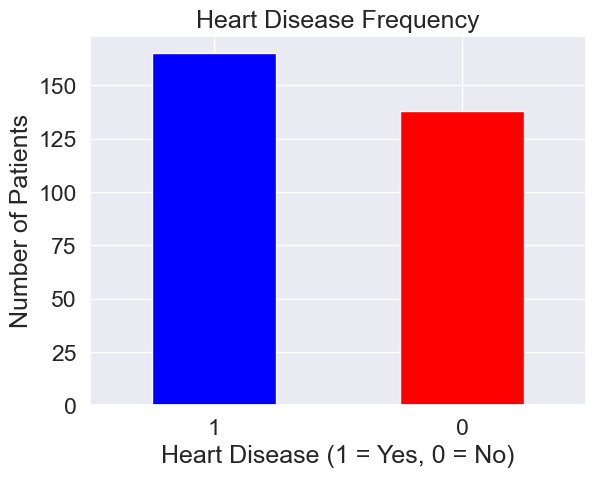

In [99]:
df["target"].value_counts().plot.bar(color=["blue", "red"]);
plt.title("Heart Disease Frequency")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)

plt.savefig("images/Heart_disease_frequency.jpg")
plt.show()




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are they any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart Disease frequency according to Sex

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# compare target column with sex column
cross = pd.crosstab(df["target"], df["sex"])
cross

sex,0,1
target,,
0,24,114
1,72,93


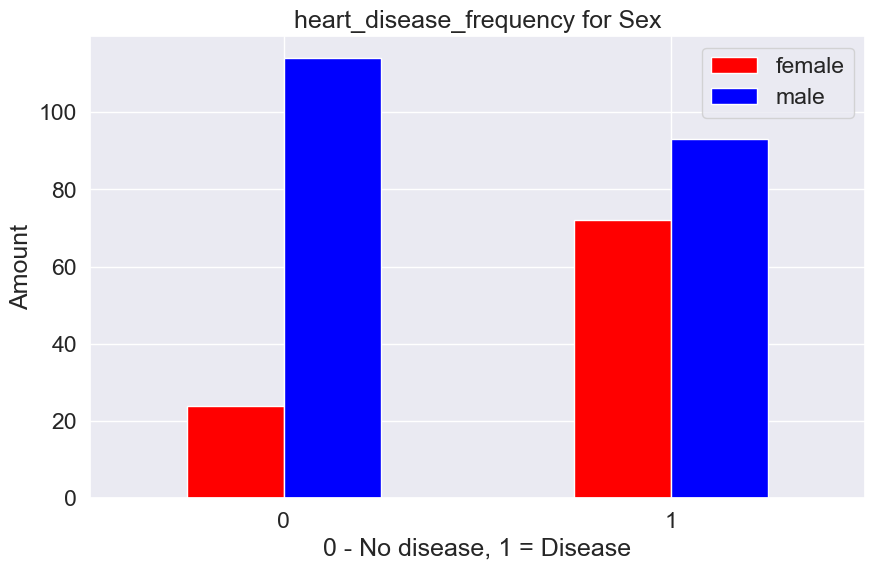

In [100]:
# Create a plot of crosstab
cross.plot.bar(color=["red", "blue"], figsize=(10, 6))
plt.title("heart_disease_frequency for Sex")
plt.xlabel("0 - No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["female", "male"]);
plt.xticks(rotation=0);

plt.savefig("images/Heart_disease_frequency_for_sex.jpg")
plt.show()

## Age vs. Max Heart Rate for Heart Disease

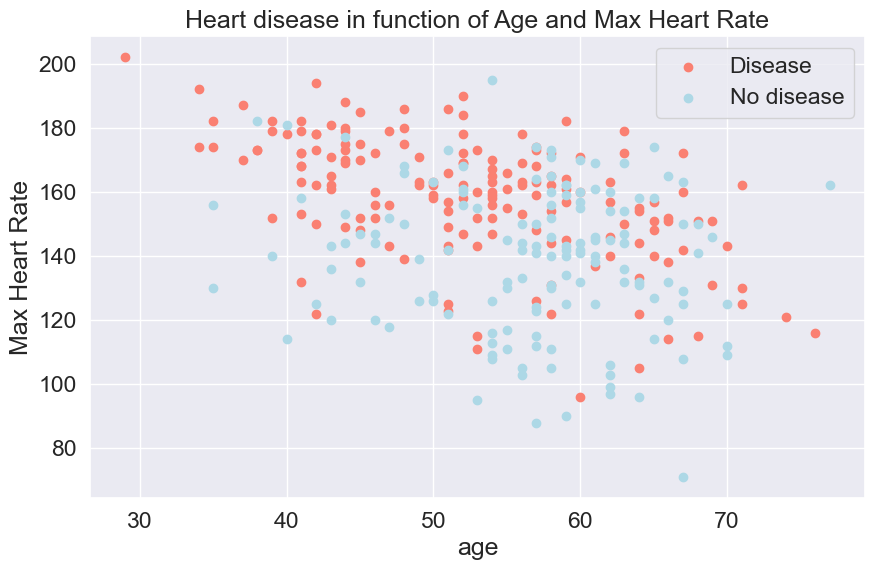

In [101]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])
plt.savefig("images/Age_vs_MaxHeartRate.jpg")

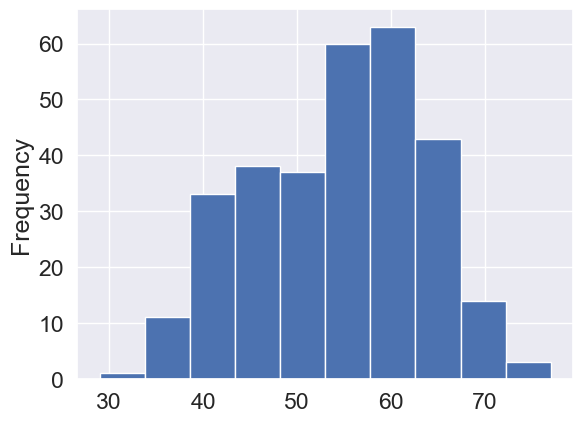

In [103]:
# what is the distribution of the age column with histogram (spread)
df.age.plot.hist();
plt.savefig("images/age_spread.jpg")
plt.show()

## Heart Disease Frequency per Chest Pain Type

cp: Type of chest pain experienced by patient. This term categorized into 4 category. (0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal))

In [15]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


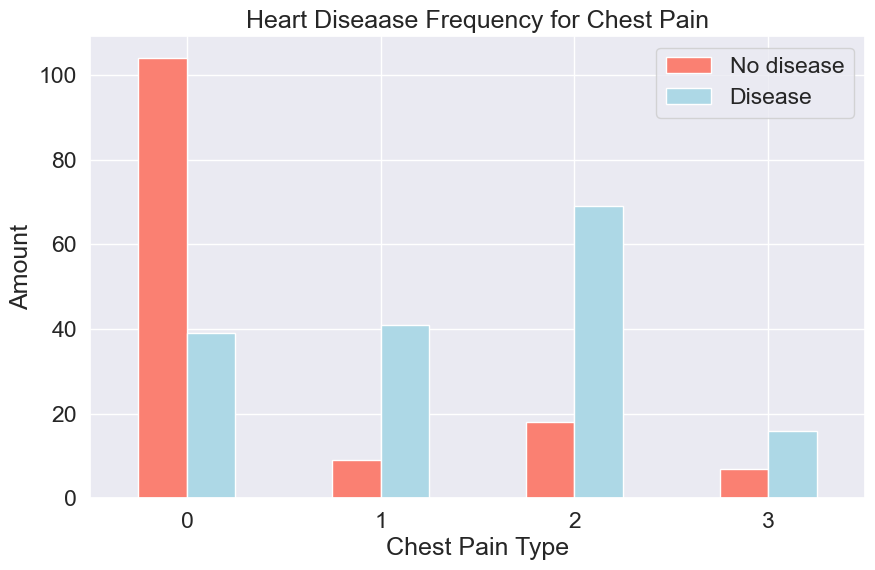

In [104]:
pd.crosstab(df["cp"], df["target"]).plot.bar(figsize=(10, 6), color=["salmon", "lightblue"]);

# Add some communication
plt.title("Heart Diseaase Frequency for Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);
plt.savefig("images/Heart_disease_frequency_for_ChestPain.jpg")
plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


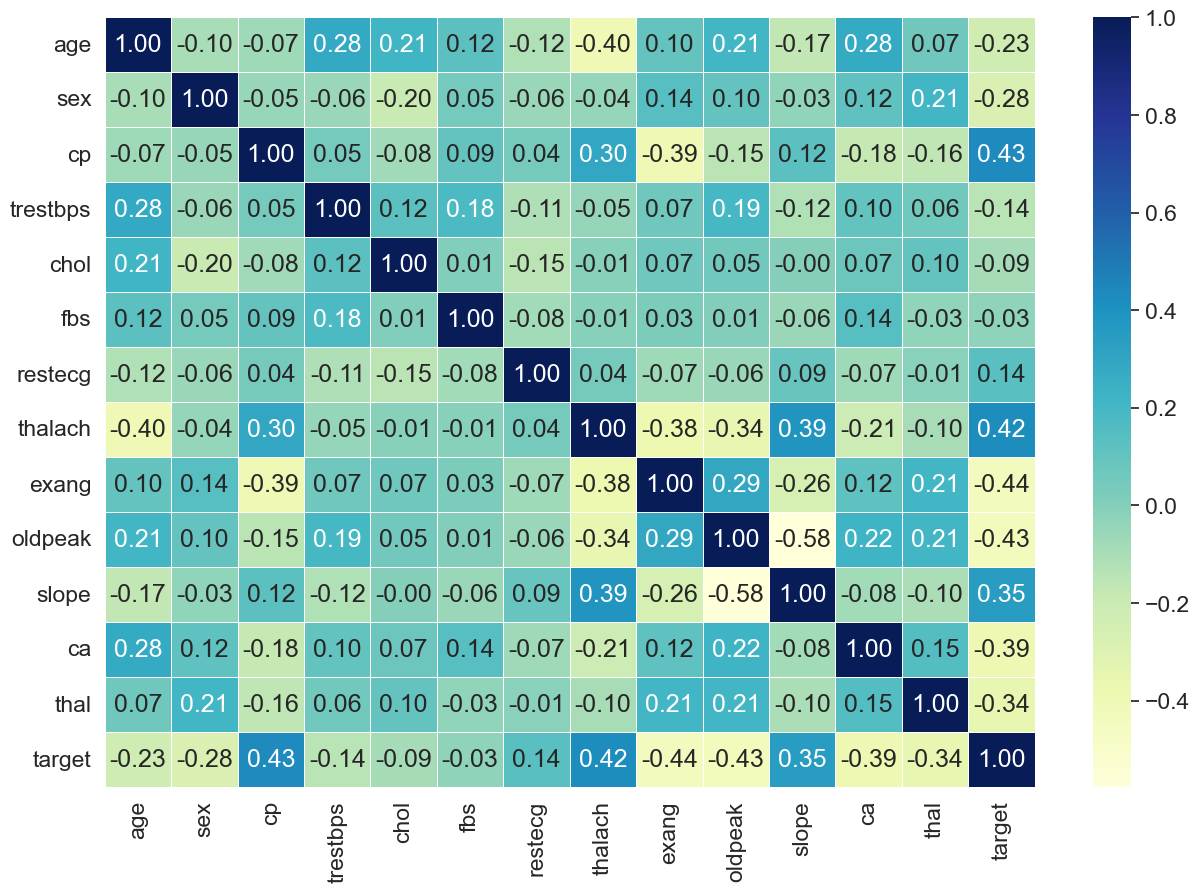

In [106]:
# lets make our correlation metrics a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.yticks(rotation=0);
plt.savefig("images/correlation_metrics.jpg")


In [20]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


In [21]:
df.groupby("exang")["target"].mean()

exang
0    0.696078
1    0.232323
Name: target, dtype: float64

## 5. Modeling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data to x and y
x = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
x_train.shape, y_train.shape

((242, 13), (242,))

Now we've got our data split into training and test sets, it's time to build a machine learning model. 

We will train it (find the patterns) on the training set.

and we will test it (use the patterns) on the test set.

We going to try 3 different Machine learning model:
1. LogisticRegression
2. K-NearestNeighborsClassifier
3. RandomForestClassifier

In [25]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}


# create a function to fit and score the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dictionary of different scikit ML models
    x_train: feature datasets for training
    x_test: feature datasets for testing
    y_train: target variables for training
    y_test: target variable for testing
    """
    # Set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_score = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to model_score
        model_score[name] = model.score(x_test, y_test)
    return model_score

model_score = fit_and_score(models, x_train, x_test, y_train, y_test)
model_score
    




    

C:\Users\HP\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

model_compare = pd.DataFrame(model_score, index=["accuracy"]);
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Now we've got a baseline model and we know a model first prediction arent always what we should base our next steps off. what shpuld we do?

lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion-matrix
* cross validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* Area under the curve(AUC)

## Hyperparameter Tuning (by Hand)

In [26]:
# lets tune KNN
train_scores = []
test_scores = []

# Create a list of diffferent values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
Knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    Knn.set_params(n_neighbors=i)

    # fit the algorithms
    Knn.fit(x_train, y_train)

    # update the training scores list
    train_scores.append(Knn.score(x_train, y_train))

    # update the test score list
    test_scores.append(Knn.score(x_test, y_test))
    


In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The maximum KNN score: 75.41% 


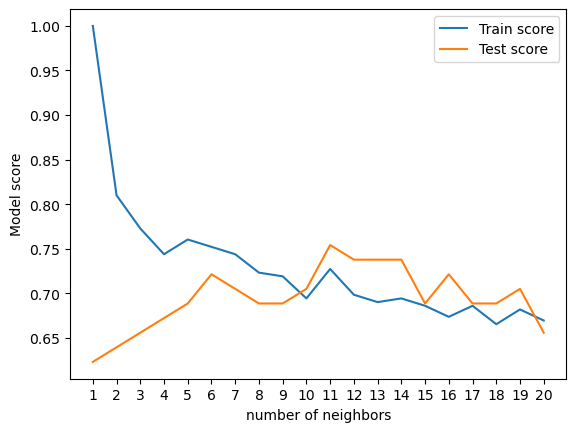

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f"The maximum KNN score: {max(test_scores)*100:.2f}% ")

## Hyperparameter Tuning (RandomizedSearchCV)

We are going to tune:

* LogisticRegression
* RandomForestClassifier

.. using RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV


# Create a hyperparameter grid for logistic regression


# Create a hyperparamter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}




Now weve got hyperparameter grids setup for each of our moels, let's tune them using RandomizedSearchCV

In [31]:
np.random.seed(42)

log_grid = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

logistic = LogisticRegression()

# sETUP RANDOM HYPERPARAMETER SEARCH FOR LOGITICE REGRESSION

rs_log_reg = RandomizedSearchCV(estimator=logistic, param_distributions=log_grid, n_iter=20, cv=5, verbose=True)
rs_log_reg.fit(x_train, y_train)


                            
            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [33]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned logistic regression lets do the same for RandomForestClassifier

In [34]:
np.random.seed(42)

# serup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameters search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...ier(n_jobs=-1)
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [36]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## hyperparameter tuning using GridSearchCV

Since our LogisticsRegression model provides the best scores so far, we will try and improve THEM again using GridSearchCV...

In [37]:
# DIFFERENT hyperparameter grid for our logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit the GriD Hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
# check best hyperparameter
gs_log_reg.best_params_


{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

 ## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* f1-score

... and it would be great if cross-validation was used where possible.

to make comarison and evaluate pur trained model, first we need tro make predictions

In [40]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds_positive = gs_log_reg.predict_proba(x_test)[:, 1]
y_preds_positive

array([0.13274739, 0.75591518, 0.81452426, 0.05469225, 0.88453364,
       0.87070287, 0.60512182, 0.00435981, 0.01376378, 0.56138489,
       0.7172079 , 0.11904138, 0.88730101, 0.06005038, 0.96750057,
       0.93181128, 0.96404698, 0.09452756, 0.01769764, 0.0264636 ,
       0.71543156, 0.02727603, 0.14274667, 0.71660794, 0.88198278,
       0.69480581, 0.8423425 , 0.69335569, 0.01830941, 0.87782365,
       0.07150765, 0.06684154, 0.01510285, 0.14314483, 0.60229465,
       0.12640328, 0.6633502 , 0.85079097, 0.81898326, 0.84121548,
       0.54515856, 0.79250831, 0.77817602, 0.70538842, 0.83243213,
       0.02113004, 0.73216369, 0.93234387, 0.10276671, 0.06440756,
       0.13470669, 0.03554564, 0.80441973, 0.95312794, 0.31714658,
       0.00309601, 0.08734727, 0.93823575, 0.02813797, 0.01309874,
       0.06291747])

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

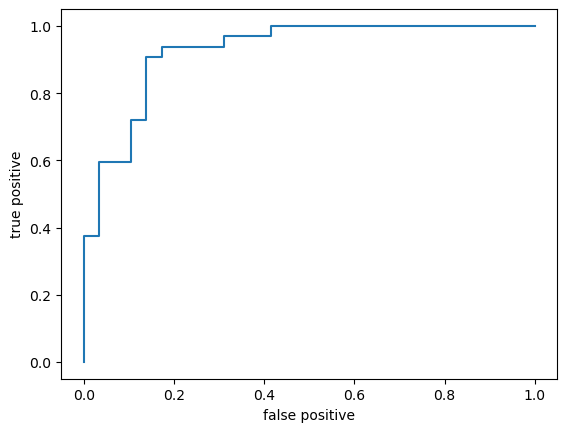

In [42]:
# import ROC curve from sklearn.metrics model
# plot ROC curve and calculate AUC metrics
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresold = roc_curve(y_test, y_preds_positive);
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("false positive")
plt.ylabel("true positive");

In [43]:
roc_auc_score(y_test, y_preds)

0.8841594827586207

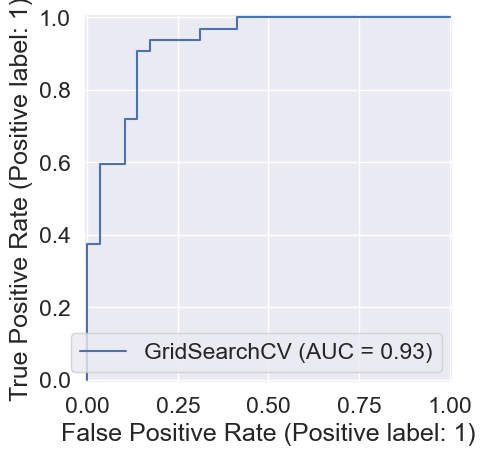

In [110]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);
plt.savefig("images/RocCurveDisplay.jpg")

In [45]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

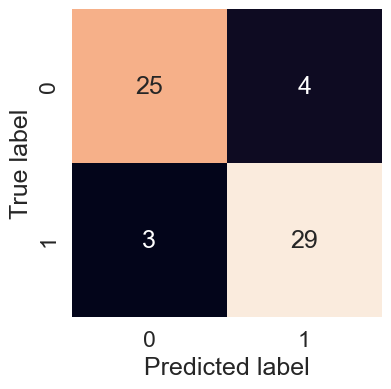

In [47]:
plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve AUC ASCORE and a confusion matrix, now lets get a classfication rport as well as cross-validated precision, recall and f1-score

In [48]:
report = classification_report(y_test, y_preds, output_dict=True)
juk = pd.DataFrame(report).T
juk

,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000


## Create evaluation metrics using cross-validation

we are going to calculate precision, recall, f1_score of our model using cros-validation and to do so we will be using `cross_val_score()`

In [49]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)


In [50]:
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)

In [51]:
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [52]:
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)

In [53]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame(data=[cv_acc, cv_precision, cv_recall, cv_f1],
                         index=["accuracy", "precision", "recall", "f1"],
                         columns=["scores"])
cv_metrics

,scores
accuracy,0.844699
precision,0.820794
recall,0.921212
f1,0.867301


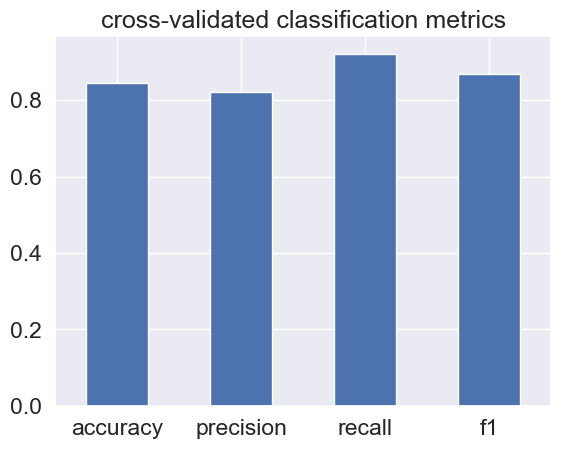

In [111]:
cv_metrics.plot.bar(legend=False);
plt.title("cross-validated classification metrics");
plt.xticks(rotation=0);
plt.savefig("images/cross-validated_classification_metrics.jpg")
plt.show()

## Feature Importance

Feature importance is another as asking "which feature contibuted most to the outcomes of the mofrl and how did they contribute?"

finding feature importance is different for each machine learning model. one way to find feature importance is to search for "MODEL NAME feature importance"

let's find the feature importance of our LogisticRegression model...


In [58]:
# fit an instance of LogisticRegressiion
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train, y_train);


In [59]:
# check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [67]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
# Visualize feture imoortance
feature_df = pd.DataFrame(feature_dict,
                         index=["importance"]).T
feature_df

,importance
age,0.003167
sex,-0.860446
cp,0.660671
trestbps,-0.011570
chol,-0.001664
fbs,0.043861
restecg,0.312758
thalach,0.024594
exang,-0.604130
oldpeak,-0.568629


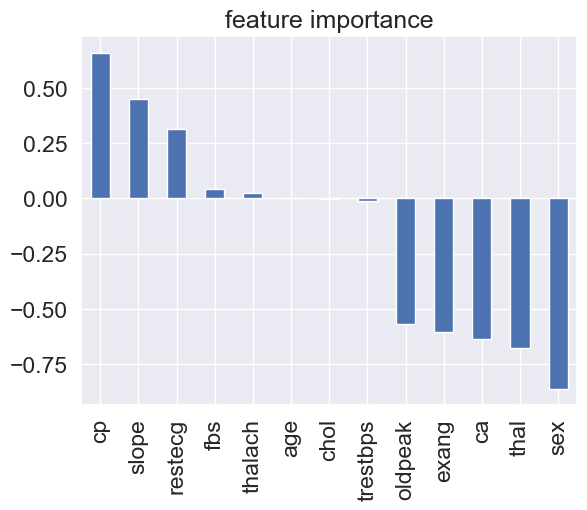

In [112]:
feature_df = feature_df.sort_values(by="importance", ascending=False)
feature_df.plot.bar(title="feature importance", legend=False)
plt.savefig("images/feature_importance")
plt.show()

In [78]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

if you havent hit your evaluation metric yet... ask yourself...

* could you collect more data?
* could you try a better model? like CatBoost or XGBoost
* could you improve the current models? (beyond what we've done so far)
* if your model is good enough (you have hit your evaluation metric) how would you export and share it with others?


In [113]:
from joblib import load, dump
dump(clf, filename="heart_disease_model.joblib")

['heart_disease_model.joblib']